### One-hot Encoding  Machine Learning Performance

In [22]:
import re
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [67]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Load Data

URL : https://www.kaggle.com/jruvika/fake-news-detection

In [3]:
#Read Data
df=pd.read_csv('data.csv')
df.shape

(4009, 4)

In [4]:
df.head(10)

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0
6,https://www.nytimes.com/2017/10/10/us/politics...,Kansas Tried a Tax Plan Similar to Trump’s. It...,"In 2012, Kansas lawmakers, led by Gov. Sam Bro...",1
7,https://www.reuters.com/article/us-india-cenba...,"India RBI chief: growth important, but not at ...",The Reserve Bank of India (RBI) Governor Urjit...,1
8,https://www.reuters.com/article/us-climatechan...,EPA chief to sign rule on Clean Power Plan exi...,"Scott Pruitt, Administrator of the U.S. Enviro...",1
9,https://www.reuters.com/article/us-air-berlin-...,Talks on sale of Air Berlin planes to easyJet ...,FILE PHOTO - An Air Berlin sign is seen at an ...,1


In [5]:
# Drop Nan Value
df=df.dropna()
df.shape

(3988, 4)

In [6]:
## Get the Independent Features
X=df.drop('Label',axis=1)
## Get the Dependent features
y=df['Label']

In [7]:
messages=df.copy()
messages.reset_index(inplace=True)
messages.shape

(3988, 5)

### Vocabulary Size

In [8]:
### Vocabulary size
voc_size=5000

### Data Preprocessing

In [9]:
# Data Preprocessing
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Headline'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [10]:
## One hot Representation
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
#onehot_repr

In [11]:
#Sentence Length
sent_length=0
for review_number in range(len(corpus)):
    number_of_words = len(corpus[review_number])
    if(number_of_words) > sent_length:
        sent_length = number_of_words
print(sent_length)

392


In [12]:
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...   60 3662 1759]
 [   0    0    0 ... 1247 3435 4415]
 [   0    0    0 ... 4700 4069 4230]
 ...
 [   0    0    0 ...   62 2256  609]
 [   0    0    0 ...   53  537  573]
 [   0    0    0 ... 2138 3564 1935]]


In [13]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [14]:
X_final.shape

(3988, 392)

In [15]:
y_final.shape

(3988,)

### Data Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.20, random_state=0)

# Machine Learning Algorithms

## Naive Bayes  : BernoulliNB

accuracy:   0.568
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.71      0.35      0.47       434
           1       0.52      0.83      0.64       364

    accuracy                           0.57       798
   macro avg       0.61      0.59      0.55       798
weighted avg       0.62      0.57      0.54       798



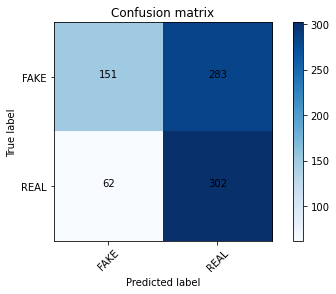

In [17]:
from sklearn.naive_bayes import BernoulliNB
bern=BernoulliNB(alpha = 0.01)
bern.fit(X_train, y_train)
pred_bern = bern.predict(X_test)
score_bern = metrics.accuracy_score(y_test, pred_bern)
print("accuracy:   %0.3f" % score_bern)
cm_bern = metrics.confusion_matrix(y_test, pred_bern)
plot_confusion_matrix(cm_bern ,classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_bern))


### Logistic Regression

accuracy:   0.580201
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.62      0.60      0.61       434
           1       0.54      0.55      0.55       364

    accuracy                           0.58       798
   macro avg       0.58      0.58      0.58       798
weighted avg       0.58      0.58      0.58       798



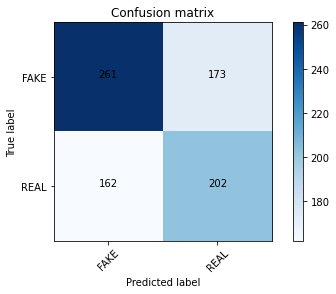

In [64]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = 2 , solver = 'newton-cg')
LR.fit(X_train,y_train)
pred_lr = LR.predict(X_test)
score_lr = metrics.accuracy_score(y_test, pred_lr)
print("accuracy:   %f" % score_lr)
cm_lr = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm_lr, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_lr))

### Decision Tree

accuracy:   0.736842
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       434
           1       0.74      0.66      0.70       364

    accuracy                           0.74       798
   macro avg       0.74      0.73      0.73       798
weighted avg       0.74      0.74      0.74       798



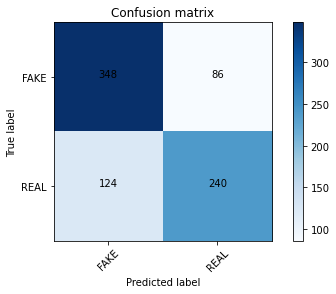

In [38]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth = None, max_leaf_nodes = None, 
                            min_samples_split = 2, min_samples_leaf = 1)
DT.fit(X_train, y_train)
pred_dt = DT.predict(X_test)
score_dt = metrics.accuracy_score(y_test, pred_dt)
print("accuracy:   %f" % score_dt)
cm_dt = metrics.confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(cm_dt, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_dt))

### Random Forest

accuracy:   0.786967
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       434
           1       0.76      0.78      0.77       364

    accuracy                           0.79       798
   macro avg       0.79      0.79      0.79       798
weighted avg       0.79      0.79      0.79       798



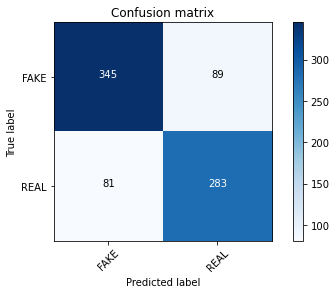

In [69]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 100, max_depth = None, min_samples_split = 2,
                             min_samples_leaf = 1, max_leaf_nodes = None)
RFC.fit(X_train, y_train)
pred_rfc=RFC.predict(X_test)
score_rfc = metrics.accuracy_score(y_test, pred_rfc)
print("accuracy:   %f" % score_rfc)
cm_rfc = metrics.confusion_matrix(y_test, pred_rfc)
plot_confusion_matrix(cm_rfc, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_rfc))

### Support Vector Machine

accuracy:   0.477444
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.52      0.50      0.51       434
           1       0.43      0.45      0.44       364

    accuracy                           0.48       798
   macro avg       0.48      0.48      0.48       798
weighted avg       0.48      0.48      0.48       798



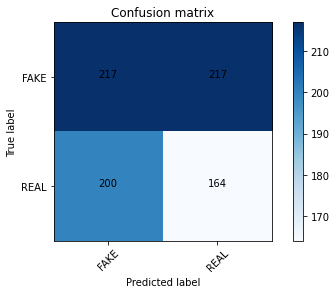

In [50]:
from sklearn import  svm
SVM = svm.SVC(kernel='sigmoid')
SVM.fit(X_train, y_train)
pred_svm=SVM.predict(X_test)
score_svm = metrics.accuracy_score(y_test, pred_svm)
print("accuracy:   %f" % score_svm)
cm_svm = metrics.confusion_matrix(y_test, pred_svm)
plot_confusion_matrix(cm_svm, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_svm))

### ANN: MLPClassifier

C:\Users\elafa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


accuracy:   0.631579
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       434
           1       0.59      0.63      0.61       364

    accuracy                           0.63       798
   macro avg       0.63      0.63      0.63       798
weighted avg       0.63      0.63      0.63       798



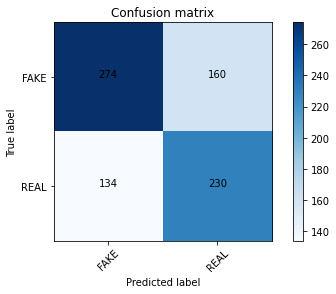

In [63]:
from sklearn.neural_network import MLPClassifier
MLPClassifierModel = MLPClassifier(activation='logistic',  solver='lbfgs', early_stopping= False,
                                   alpha= 1 ,hidden_layer_sizes=(100))
MLPClassifierModel.fit(X_train, y_train)
pred_mlp=MLPClassifierModel.predict(X_test)
score_mlp= metrics.accuracy_score(y_test, pred_mlp)
print("accuracy:   %f" % score_mlp)
cm_mlp = metrics.confusion_matrix(y_test, pred_mlp)
plot_confusion_matrix(cm_mlp, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_mlp))